# Zeroth-Order Frank Wolfe for Black-Box Adversarial Attacks

 

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### FZCGS

Reference: Gao et al.

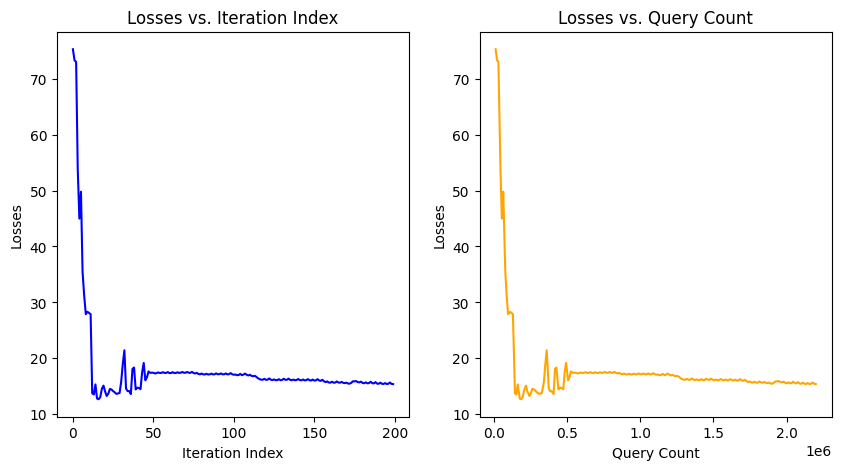

In [59]:
path = 'Results/FZCGS/'

iteration_index_FZCGS = []
query_count_FZCGS = []
losses_FZCGS = []
times_FZCGS = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index_FZCGS.append(int(words[2])) 
        losses_FZCGS.append(float(words[6]))
        query_count_FZCGS.append(int(words[4]))
        #times_FZCGS.append(float(words[6])/3600)


iteration_index_FZCGS = np.array(iteration_index_FZCGS)
losses_FZCGS = np.array(losses_FZCGS)
query_count_FZCGS = np.array(query_count_FZCGS)
#times_FZCGS = np.array(times_FZCGS)

#print("Iteration Index:", iteration_index_FZCGS)
#print("Losses:", losses_FZCGS)
#print("Query Count:", query_count_FZCGS)
#print("Times:", times_FZCGS)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_FZCGS, losses_FZCGS, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

#plt.tight_layout()
plt.show()


### SGFFW with RDSA

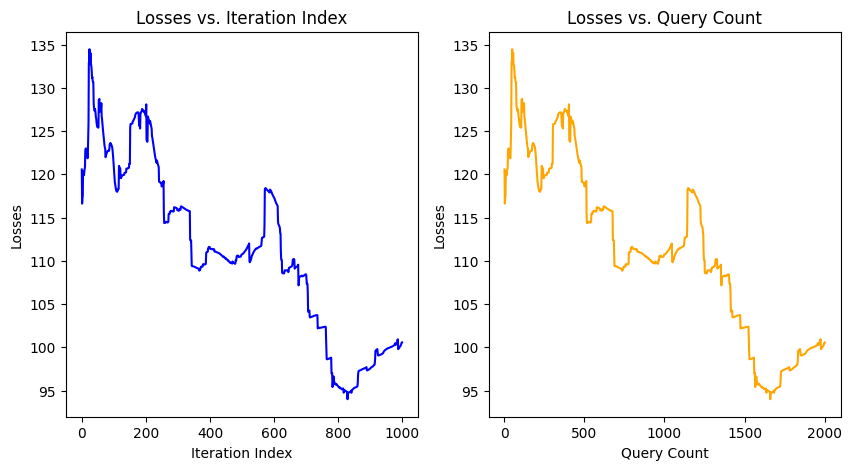

In [69]:
path = 'Results/SGFFW/RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index.append(int(words[2])) 
        losses.append(float(words[6]))
        query_count.append(int(words[4]))
        #times.append(float(words[6])/3600)


iteration_index_RDSA = np.array(iteration_index)
losses_RDSA = np.array(losses)
query_count_RDSA = np.array(query_count)
#times_RDSA = np.array(times)

#print("Iteration Index:", iteration_index_RDSA)
#print("Losses:", losses_RDSA)
#print("Query Count:", query_count_RDSA)
#print("Times:", times_RDSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_RDSA, losses_RDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_RDSA, losses_RDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count') 
plt.ylabel('Losses')

#plt.tight_layout()
plt.show()


### SGFFW with I-RDSA

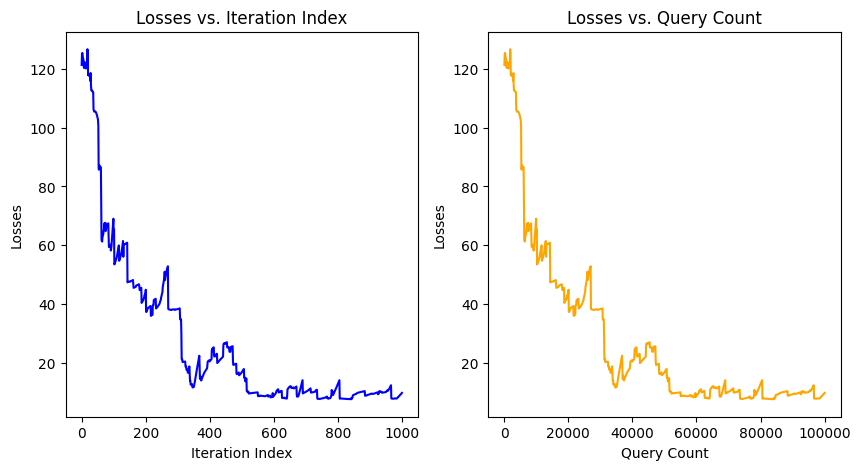

In [63]:
path = 'Results/SGFFW/I-RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        if (len(words) >= 13):
            iteration_index.append(int(words[2])) 
            losses.append(float(words[6]))
            query_count.append(int(words[4]))


iteration_index_IRDSA = np.array(iteration_index)
losses_IRDSA = np.array(losses)
query_count_IRDSA = np.array(query_count)
#times_RDSA = np.array(times)

#print("Iteration Index:", iteration_index_IRDSA)
#print("Losses:", losses_IRDSA)
#print("Query Count:", query_count_IRDSA)
#print("Times:", times_RDSA)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_IRDSA, losses_IRDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

#plt.tight_layout()
plt.show()



### SGFFW with KWSA

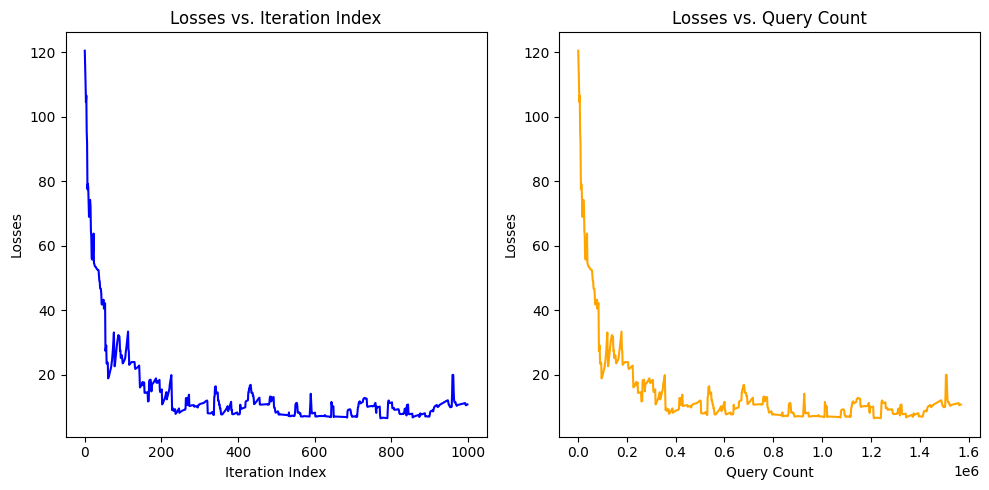

In [66]:
path = 'Results/SGFFW/KWSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
        if 'Iteration Index:' in line:
            words = line.split()
            iteration_index.append(int(words[2])) 
            losses.append(float(words[6]))
            query_count.append(int(words[4]))



iteration_index_KWSA = np.array(iteration_index)
losses_KWSA= np.array(losses)
query_count_KWSA = np.array(query_count)
#times_RDSA = np.array(times)

#print("Iteration Index:", iteration_index_KWSA)
#print("Losses:", losses_KWSA)
#print("Query Count:", query_count_KWSA)
#print("Times:", times_KWSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_KWSA, losses_KWSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_KWSA, losses_KWSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

plt.tight_layout()
plt.show()

#plt.tight_layout()
plt.show()


## All Algorithms Compared

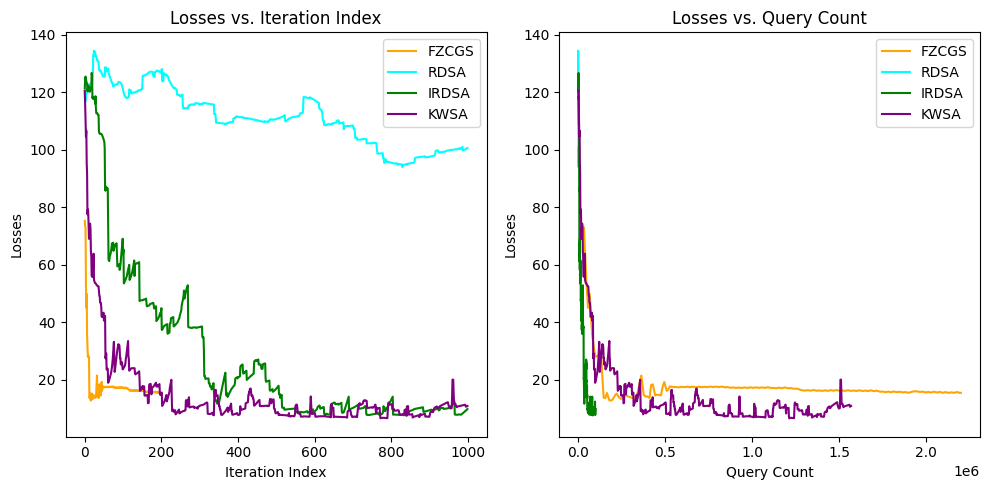

In [68]:
# Plotting losses vs. iteration index
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_FZCGS, losses_FZCGS,color='orange', label='FZCGS')
plt.plot(iteration_index_RDSA, losses_RDSA, color='cyan', label='RDSA')
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='green', label='IRDSA')
plt.plot(iteration_index_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')
plt.legend()

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(query_count_RDSA, losses_RDSA, color='cyan', label='RDSA')
plt.plot(query_count_IRDSA, losses_IRDSA, color='green', label='IRDSA')
plt.plot(query_count_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.legend()

plt.tight_layout()
plt.show()